In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets, preprocessing, model_selection
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
gcd_data = pd.read_csv('./nguyenvanhieu.vn-master/german_credit.csv')

In [3]:
gcd_data.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [5]:
print(gcd_data.head(10))

   Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   
5              1                1                          10   
6              1                1                           8   
7              1                1                           6   
8              1                4                          18   
9              1                2                          24   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                           

In [6]:
gcd_data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [7]:
# Vì mong muốn dự báo KH xấu, chuyển các KH tốt về Credibility=0, và KH xấu về Credibility=1
gcd_data.loc[:,'Creditability'] = 1 - gcd_data.loc[:,'Creditability']
gcd_data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,0.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [8]:
#choose Features - chọn biến
features = gcd_data.columns[1:]
#get data
X = gcd_data.loc[:,features].values
y = gcd_data.loc[:,'Creditability'].values

#train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.3,
                                                                    random_state= 1992,
                                                                    stratify = y)

In [10]:
print(y.sum()/y.shape[0])
print(y_train.sum()/y_train.shape[0])

0.3
0.3


In [11]:
help(linear_model.LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

In [12]:
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train)
print('Coeficient',logit.coef_, 'Intercept', logit.intercept_)
y_pred = logit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))

Coeficient [[-4.91145018e-01  3.52385202e-02 -4.70568300e-01 -2.02702330e-02
   5.70218101e-05 -3.05126954e-01 -1.03207645e-01  2.49480792e-01
  -1.40133990e-01 -2.44035251e-01  6.60052385e-02  1.60032762e-01
  -1.16967251e-02 -7.60438883e-02 -1.85237782e-01  3.21606973e-01
   1.95134105e-01  3.61270549e-01 -3.22552632e-01  2.60867078e-02]] Intercept [0.74182783]
Confusion Matrix:
 [[188  22]
 [ 55  35]]
Precision:  0.8952380952380953
Recall:  0.7736625514403292


Confusion Matrix:
 [[447  43]
 [118  92]]
Precision:  0.9122448979591836
Recall:  0.7911504424778761
(AUC = 0.81)
(GINI = 0.62)


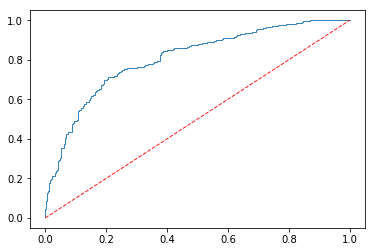

In [16]:
y_t_pred = logit.predict(X_train)
cm = confusion_matrix(y_train, y_t_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))
y_t_prob = logit.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_t_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0,1], [0,1], lw=1, alpha=0.9, linestyle='dashed',color='red')
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))
plt.show()

(AUC = 0.76)
(GINI = 0.53)


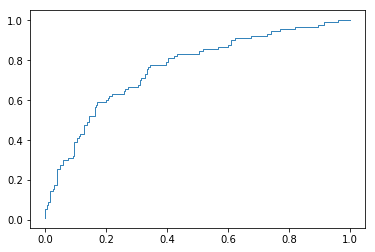

In [17]:
y_prob = logit.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))

In [18]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logit.fit(X_train_scaled, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Confusion Matrix:
 [[444  46]
 [104 106]]
Precision:  0.9061224489795918
Recall:  0.8102189781021898
(AUC = 0.82)
(GINI = 0.64)


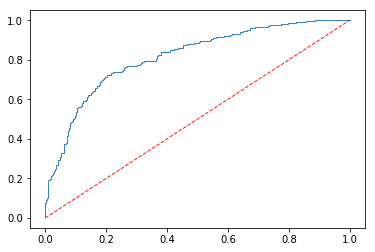

In [19]:
y_t_pred = logit.predict(X_train_scaled)
cm = confusion_matrix(y_train, y_t_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))
y_t_prob = logit.predict_proba(X_train_scaled)
fpr, tpr, thresholds = roc_curve(y_train, y_t_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0,1], [0,1], lw=1, alpha=0.9, linestyle='dashed',color='red')
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))
plt.show()

Coeficient [[-0.65840874  0.40634514 -0.56000606 -0.09626364  0.18732011 -0.50449349
  -0.14595654  0.2389091  -0.16102763 -0.17521599  0.01981013  0.15580601
  -0.15488164 -0.17088755 -0.18656452  0.21632734  0.04679367  0.05749971
  -0.16686827 -0.30812289]]
Confusion Matrix:
 [[187  23]
 [ 50  40]]
Precision:  0.8904761904761904
Recall:  0.7890295358649789
(AUC = 0.76)
(GINI = 0.53)


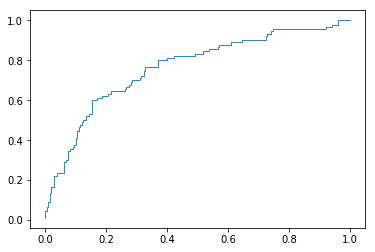

In [20]:
print('Coeficient',logit.coef_)
y_pred = logit.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))
y_prob = logit.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))

In [25]:
logit1 = linear_model.LogisticRegression(C=50)
logit1.fit(X_train_scaled, y_train)

print('Coeficient',logit1.coef_)
y_pred = logit1.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))

Coeficient [[-0.66807363  0.41303962 -0.57153402 -0.09981841  0.18944122 -0.51490007
  -0.14824082  0.24399869 -0.1633585  -0.17810504  0.01938601  0.15778227
  -0.15684179 -0.17393926 -0.19068424  0.22369427  0.04795365  0.05844817
  -0.1708675  -0.32147168]]
Confusion Matrix:
 [[187  23]
 [ 50  40]]
Precision:  0.8904761904761904
Recall:  0.7890295358649789


(AUC = 0.76)
(GINI = 0.53)


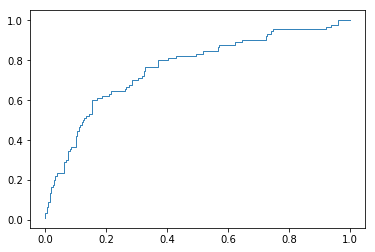

In [26]:
y_prob = logit1.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))

In [32]:
from sklearn.model_selection import GridSearchCV
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ('Training set score', (gs.cv_results_['mean_train_score']*100).round(2))
    print ('Validation set score', (gs.cv_results_['mean_test_score']*100).round(2))
    best = gs.best_estimator_
    return best
print([(e+1)*1 for e in range(11)])
best_logit = cv_optimize(logit1, {'C':[(e+1)*1 for e in range(11)]}, X_train_scaled, y_train, score_func = 'roc_auc')
print(best_logit)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Training set score [81.99 82.   82.   82.   82.   82.   82.   82.   82.   82.   82.  ]
Validation set score [78.97 78.97 78.98 78.97 78.97 78.96 78.96 78.96 78.96 78.97 78.97]
LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [33]:
print('Coeficient',best_logit.coef_)
y_pred = best_logit.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))

Coeficient [[-0.66491688  0.41087528 -0.5677324  -0.09865191  0.18869921 -0.51146675
  -0.14748895  0.24231886 -0.16259094 -0.17717134  0.01951738  0.15712943
  -0.15619888 -0.17293704 -0.18931991  0.22124732  0.04757995  0.05814971
  -0.16954909 -0.31698118]]
Confusion Matrix:
 [[187  23]
 [ 50  40]]
Precision:  0.8904761904761904
Recall:  0.7890295358649789


(AUC = 0.76)
(GINI = 0.53)


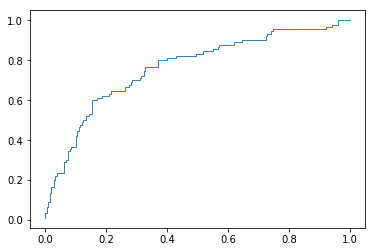

In [34]:
y_prob = best_logit.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))